<a href="https://colab.research.google.com/github/dcipicchio/Fantasy-Football/blob/main/VOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

scoring_weights = {
    'receptions': 1, # PPR
    'receiving_yds': 0.1,
    'receiving_td': 6,
    'FL': -2, #fumbles lost
    'rushing_yds': 0.1,
    'rushing_td': 6,
    'passing_yds': 0.04,
    'passing_td': 4,
    'int': -2
}

df = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/data/master/fantasypros/fp_projections.csv')

df = df.iloc[:, 1:]

df['FantasyPoints'] = ((df['Receptions'] * scoring_weights['receptions']) + (df['ReceivingYds'] * scoring_weights['receiving_yds']) + 
                       (df['ReceivingTD'] * scoring_weights['receiving_td']) + (df['FL'] * scoring_weights['FL']) + (df['RushingYds'] * scoring_weights['rushing_yds']) + 
                       (df['RushingTD'] * scoring_weights['rushing_td']) + (df['PassingYds'] * scoring_weights['passing_yds']) + (df['PassingTD'] * scoring_weights['passing_td']) +
                       (df['Int'] * scoring_weights['int']))
df.head()
              

,Player,Team,Pos,Receptions,ReceivingYds,ReceivingTD,FL,RushingAtt,RushingYds,RushingTD,PassingAtt,PassingCmp,PassingYds,PassingTD,Int,FieldGoalsMade,FieldGoalsAttempted,ExtraPointsMade,TotalSacks,TotalInt,FumblesRecovered,FumblesForced,DefensiveTDs,SafetysForced,PointsAllowed,FantasyPoints
0,Lamar Jackson,BAL,QB,0.0,0.0,0.0,2.4,160.8,967.8,5.8,469.5,302.5,3493.6,29.7,12.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,361.124
1,Patrick Mahomes,KC,QB,0.0,0.0,0.0,1.2,55.6,302.0,2.8,573.4,374.5,4604.6,34.6,10.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,345.384
2,Dak Prescott,DAL,QB,0.0,0.0,0.0,2.3,64.4,261.4,3.7,581.9,379.9,4551.9,29.2,12.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,318.416
3,Deshaun Watson,HOU,QB,0.0,0.0,0.0,1.8,92.9,491.2,4.8,530.2,349.3,4019.2,25.9,12.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,312.888
4,Russell Wilson,SEA,QB,0.0,0.0,0.0,1.6,72.1,373.7,2.4,500.2,329.0,3957.3,29.6,8.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,308.462


In [ ]:
adp = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/data/master/fantasypros/adp/PPR_ADP.csv')
adp = adp.iloc[:,1:]    
adp['ADP RANK'] = adp['AVG'].rank()
adp_cutoff = adp[:100]
replacement_players = {'QB': '', 'RB': '', 'WR': '', 'TE': ''}

for _, row in adp_cutoff.iterrows():
  position = row['POS']
  player = row['PLAYER']
  if position in replacement_players:
    replacement_players[position] = player

print(replacement_players)

{'QB': 'Aaron Rodgers', 'RB': 'Latavius Murray', 'WR': 'Jamison Crowder', 'TE': 'Rob Gronkowski'}


In [ ]:
df = df[['Player', 'Pos', 'Team', 'FantasyPoints']]
replacement_values = {}
for position, player_name in replacement_players.items():
  player = df.loc[df['Player'] == player_name]
  replacement_values[position] = player['FantasyPoints'].tolist()[0]

{'QB': 277.432, 'RB': 118.62, 'WR': 192.27999999999997, 'TE': 139.5}


In [ ]:
pd.set_option('chained_assignment', None)
df = df.loc[df['Pos'].isin(['QB','RB','WR','TE'])]
df['VOR'] = df.apply(lambda row: row['FantasyPoints'] - replacement_values.get(row['Pos']), axis=1)
df.head()

pd.set_option('display.max_rows', None)
df['VOR Rank'] = df['VOR'].rank(ascending=False)

df['VOR'] = df['VOR'].apply(lambda x: (x - df['VOR'].min())/ (df['VOR'].max() - df['VOR'].min()))
df = df.sort_values(by='VOR Rank')
df.head(100)

,Player,Pos,Team,FantasyPoints,VOR,VOR Rank
12,Christian McCaffrey,RB,CAR,375.060,1.000000,1.0
23,Saquon Barkley,RB,NYG,310.790,0.879615,2.0
25,Ezekiel Elliott,RB,DAL,299.750,0.858936,3.0
33,Alvin Kamara,RB,NO,295.950,0.851818,4.0
30,Dalvin Cook,RB,MIN,289.980,0.840636,5.0
26,Derrick Henry,RB,TEN,261.780,0.787814,6.0
34,Michael Thomas,WR,NO,333.180,0.783581,7.0
35,Clyde Edwards-Helaire,RB,KC,254.230,0.773672,8.0
43,Austin Ekeler,RB,LAC,252.900,0.771181,9.0
38,Miles Sanders,RB,PHI,249.220,0.764288,10.0


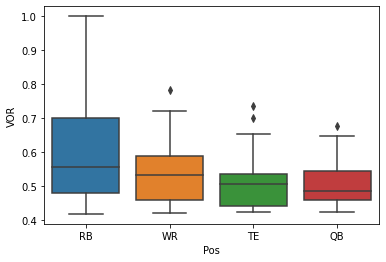

In [ ]:
import seaborn as sns

num_teams = 12
num_spots = 16
draft_pool = num_teams * num_spots

df_copy = df[:draft_pool]
sns.boxplot(x=df_copy['Pos'], y=df_copy['VOR']);

In [ ]:
df = df.rename({'VOR': 'Value', 'VOR Rank': 'Value Rank'}, axis=1)
df.head(20)

,Player,Pos,Team,FantasyPoints,Value,Value Rank
12,Christian McCaffrey,RB,CAR,375.06,1.000000,1.0
23,Saquon Barkley,RB,NYG,310.79,0.879615,2.0
25,Ezekiel Elliott,RB,DAL,299.75,0.858936,3.0
33,Alvin Kamara,RB,NO,295.95,0.851818,4.0
30,Dalvin Cook,RB,MIN,289.98,0.840636,5.0
26,Derrick Henry,RB,TEN,261.78,0.787814,6.0
34,Michael Thomas,WR,NO,333.18,0.783581,7.0
35,Clyde Edwards-Helaire,RB,KC,254.23,0.773672,8.0
43,Austin Ekeler,RB,LAC,252.90,0.771181,9.0
38,Miles Sanders,RB,PHI,249.22,0.764288,10.0


In [ ]:
adp = adp.rename({'PLAYER': 'Player', 'POS': 'Pos', 'AVG': 'Average ADP', 'ADP RANK': 'ADP Rank'}, axis=1)
final_df = df.merge(adp, how='left', on=['Player', 'Pos'])
final_df['difference between ADP and Value'] = final_df['ADP Rank'] - final_df['Value Rank']
final_df.head(20)

,Player,Pos,Team,FantasyPoints,Value,Value Rank,Average ADP,ADP Rank,difference between ADP and Value
0,Christian McCaffrey,RB,CAR,375.06,1.000000,1.0,1.0,1.0,0.0
1,Saquon Barkley,RB,NYG,310.79,0.879615,2.0,2.0,2.0,0.0
2,Ezekiel Elliott,RB,DAL,299.75,0.858936,3.0,3.5,3.0,0.0
3,Alvin Kamara,RB,NO,295.95,0.851818,4.0,5.5,6.0,2.0
4,Dalvin Cook,RB,MIN,289.98,0.840636,5.0,5.0,5.0,0.0
5,Derrick Henry,RB,TEN,261.78,0.787814,6.0,7.5,7.0,1.0
6,Michael Thomas,WR,NO,333.18,0.783581,7.0,4.0,4.0,-3.0
7,Clyde Edwards-Helaire,RB,KC,254.23,0.773672,8.0,20.5,21.5,13.5
8,Austin Ekeler,RB,LAC,252.90,0.771181,9.0,12.0,10.5,1.5
9,Miles Sanders,RB,PHI,249.22,0.764288,10.0,14.5,13.0,3.0


In [ ]:
draft_pool = final_df.sort_values(by='ADP Rank')[:196]
rb_pool = draft_pool.loc[draft_pool['Pos'] == 'RB']
qb_pool = draft_pool.loc[draft_pool['Pos'] == 'QB']
wr_pool = draft_pool.loc[draft_pool['Pos'] == 'WR']
te_pool = draft_pool.loc[draft_pool['Pos'] == 'TE']

rb_pool.sort_values(by='difference between ADP and Value', ascending=False)[:10]

,Player,Pos,Team,FantasyPoints,Value,Value Rank,Average ADP,ADP Rank,difference between ADP and Value
65,Ryquell Armstead,RB,JAC,140.35,0.560363,66.0,138.5,136.0,70.0
80,Antonio Gibson,RB,WAS,129.26,0.539590,81.0,141.0,140.0,59.0
138,Darrynton Evans,RB,TEN,90.65,0.467269,139.0,193.5,191.0,52.0
30,Ronald Jones II,RB,TB,179.79,0.634238,31.0,83.0,78.0,47.0
35,Tarik Cohen,RB,CHI,171.24,0.618223,36.0,87.5,83.0,47.0
74,Duke Johnson,RB,HOU,134.83,0.550023,75.0,125.0,121.0,46.0
104,Adrian Peterson,RB,WAS,114.31,0.511587,105.0,147.0,147.0,42.0
58,Kerryon Johnson,RB,DET,149.42,0.577352,59.0,100.0,98.5,39.5
40,James White,RB,NE,166.68,0.609682,41.0,75.5,74.0,33.0
33,Kareem Hunt,RB,CLE,174.14,0.623655,34.0,60.0,64.5,30.5
